### Deliverable 3 - Optimization Trial 2
##### Add 3rd hidden layer.  Increase epochs to 100.  Change model to tanh.


#### Start with Deliveable 1 Code: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df_new=application_df.drop(columns=["EIN", "NAME"])
#application_df_new=application_df.drop(columns=["EIN", "NAME","STATUS"])
application_df_new.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Generate our categorical variable list
application_cat = application_df_new.dtypes[application_df_new.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [4]:
# Determine the number of unique values in each column.
application_df_new[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [5]:
# Generate our variable list
application_all_var = application_df_new.dtypes.index.tolist()
application_all_var

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'STATUS',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT',
 'IS_SUCCESSFUL']

In [6]:
# Determine the number of unique values in each column.
application_df_new[application_all_var].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df_new.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

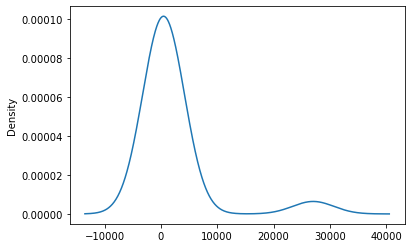

In [8]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ...?
replace_application=list(application_type_counts[application_type_counts < 500].index)

# Replace in dataframe
for i in replace_application:
    application_df_new.APPLICATION_TYPE = application_df_new.APPLICATION_TYPE.replace(i,"Other")
    
# Check to make sure binning was successful
application_df_new.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
classification_counts=application_df_new.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

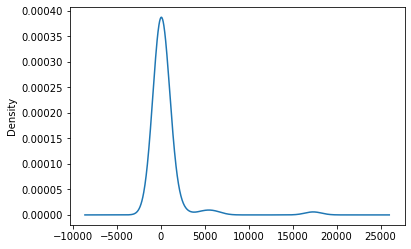

In [11]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [12]:
# Determine which values to replace if counts are less than ..?
replace_class=list(classification_counts[classification_counts < 1500].index)

# Replace in dataframe
for j in replace_class:
    application_df_new.CLASSIFICATION = application_df_new.CLASSIFICATION.replace(j,"Other")
    
# Check to make sure binning was successful
application_df_new.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
# Generate our categorical variable lists
application_cat = application_df_new.dtypes[application_df_new.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df_new[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Merge one-hot encoded features and drop the originals
application_df_new = application_df_new.merge(encode_df,left_index=True, right_index=True)
application_df_new = application_df_new.drop(application_cat,1)
pd.set_option('display.max_columns', None)
application_df_new.head()

C:\Users\laura\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Split our preprocessed data into our features and target arrays
y = application_df_new["IS_SUCCESSFUL"].values
X = application_df_new.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\laura\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 3: Compile, Train and Evaluate the Model using different inputs for optimization

#### Attempt 1 to achieve higher than 75% Model Accuracy

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
# Add our first Dense layer, including the input layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))


# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

##another way to write it
# # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# #  YOUR CODE GOES HERE

# nn_model = tf.keras.models.Sequential()

# # First hidden layer
# #  YOUR CODE GOES HERE
# # Add our first Dense layer, including the input layer
# nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=43))

# # Second hidden layer
# nn_model.add(tf.keras.layers.Dense(units=30, activation="relu", input_dim=2))

# # Output layer
# #  YOUR CODE GOES HERE
# # Add the output layer that uses a probability activation function
# nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# # Check the structure of the model
# nn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,271
Trainable params: 6,271
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 

Epoch 1/100
804/804 [==============================] - 1s 690us/step - loss: 0.5685 - accuracy: 0.7225
Epoch 2/100
804/804 [==============================] - 1s 695us/step - loss: 0.5559 - accuracy: 0.7303
Epoch 3/100
804/804 [==============================] - 1s 700us/step - loss: 0.5524 - accuracy: 0.7315
Epoch 4/100
804/804 [==============================] - 1s 696us/step - loss: 0.5498 - accuracy: 0.7330
Epoch 5/100
804/804 [==============================] - 1s 694us/step - loss: 0.5488 - accuracy: 0.7336
Epoch 6/100
804/804 [==============================] - 1s 691us/step - loss: 0.5477 - accuracy: 0.7343
Epoch 7/100
804/804 [==============================] - 1s 687us/step - loss: 0.5466 - accuracy: 0.7337
Epoch 8/100
804/804 [==============================] - 1s 691us/step - loss: 0.5458 - accuracy: 0.7350
Epoch 9/100
804/804 [==============================] - 1s 689us/step - loss: 0.5453 - accuracy: 0.7359
Epoch 10/100
804/804 [==============================] - 1s 692us/step - l

804/804 [==============================] - 1s 707us/step - loss: 0.5334 - accuracy: 0.7415
Epoch 80/100
804/804 [==============================] - 1s 705us/step - loss: 0.5331 - accuracy: 0.7421
Epoch 81/100
804/804 [==============================] - 1s 723us/step - loss: 0.5332 - accuracy: 0.7414
Epoch 82/100
804/804 [==============================] - 1s 696us/step - loss: 0.5335 - accuracy: 0.7414
Epoch 83/100
804/804 [==============================] - 1s 693us/step - loss: 0.5330 - accuracy: 0.7422
Epoch 84/100
804/804 [==============================] - 1s 698us/step - loss: 0.5333 - accuracy: 0.7408
Epoch 85/100
804/804 [==============================] - 1s 691us/step - loss: 0.5332 - accuracy: 0.7420
Epoch 86/100
804/804 [==============================] - 1s 701us/step - loss: 0.5331 - accuracy: 0.7416
Epoch 87/100
804/804 [==============================] - 1s 691us/step - loss: 0.5329 - accuracy: 0.7420
Epoch 88/100
804/804 [==============================] - 1s 696us/step - loss:

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5557 - accuracy: 0.7249 - 222ms/epoch - 828us/step
Loss: 0.5556844472885132, Accuracy: 0.7248979806900024


<AxesSubplot:>

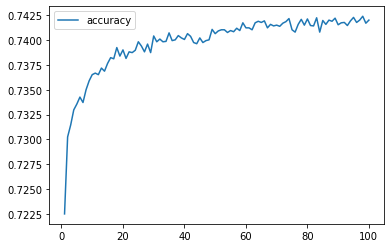

In [22]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

In [23]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimize2/",exist_ok=True)
checkpoint_path = "checkpoints_optimize2/weights.{epoch:02d}.hdf5"

In [26]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq="epoch",
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 1s 703us/step - loss: 0.5319 - accuracy: 0.7424
Epoch 2/100
804/804 [==============================] - 1s 698us/step - loss: 0.5316 - accuracy: 0.7424
Epoch 3/100
804/804 [==============================] - 1s 702us/step - loss: 0.5314 - accuracy: 0.7426
Epoch 4/100
804/804 [==============================] - 1s 702us/step - loss: 0.5314 - accuracy: 0.7423
Epoch 5/100
797/804 [============================>.] - ETA: 0s - loss: 0.5317 - accuracy: 0.7420
Epoch 5: saving model to checkpoints_optimize2\weights.05.hdf5
804/804 [==============================] - 1s 710us/step - loss: 0.5314 - accuracy: 0.7420
Epoch 6/100
804/804 [==============================] - 1s 699us/step - loss: 0.5316 - accuracy: 0.7423
Epoch 7/100
804/804 [==============================] - 1s 696us/step - loss: 0.5317 - accuracy: 0.7420
Epoch 8/100
804/804 [==============================] - 1s 717us/step - loss: 0.5316 - accuracy: 0.7426
Epoch 9/100
804/804 [=======

804/804 [==============================] - 1s 688us/step - loss: 0.5310 - accuracy: 0.7423
Epoch 62/100
804/804 [==============================] - 1s 694us/step - loss: 0.5310 - accuracy: 0.7427
Epoch 63/100
804/804 [==============================] - 1s 694us/step - loss: 0.5311 - accuracy: 0.7428
Epoch 64/100
804/804 [==============================] - 1s 694us/step - loss: 0.5309 - accuracy: 0.7424
Epoch 65/100
793/804 [============================>.] - ETA: 0s - loss: 0.5312 - accuracy: 0.7420
Epoch 65: saving model to checkpoints_optimize2\weights.65.hdf5
804/804 [==============================] - 1s 715us/step - loss: 0.5310 - accuracy: 0.7423
Epoch 66/100
804/804 [==============================] - 1s 691us/step - loss: 0.5308 - accuracy: 0.7429
Epoch 67/100
804/804 [==============================] - 1s 691us/step - loss: 0.5312 - accuracy: 0.7428
Epoch 68/100
804/804 [==============================] - 1s 695us/step - loss: 0.5310 - accuracy: 0.7423
Epoch 69/100
804/804 [==========

In [27]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization2.h5")